In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

591

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"


In [9]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather.status_code

200

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":39.25,"feels_like":32.36,"temp_min":37,"temp_max":41,"pressure":1003,"humidity":87},"visibility":10000,"wind":{"speed":6.91,"deg":230},"clouds":{"all":90},"dt":1612564788,"sys":{"type":1,"id":3486,"country":"US","sunrise":1612525995,"sunset":1612562598},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [12]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 39.25,
  'feels_like': 32.36,
  'temp_min': 37,
  'temp_max': 41,
  'pressure': 1003,
  'humidity': 87},
 'visibility': 10000,
 'wind': {'speed': 6.91, 'deg': 230},
 'clouds': {'all': 90},
 'dt': 1612564788,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1612525995,
  'sunset': 1612562598},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 39.25,
  'feels_like': 32.36,
  'temp_min': 37,
  'temp_max': 41,
  'pressure': 1003,
  'humidity': 87},
 'visibility': 10000,
 'wind': {'speed': 6.91, 'deg': 230},
 'clouds': {'all': 90},
 'dt': 1612564788,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1612525995,
  'sunset': 1612562598},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Get the JSON data.
boston_data = city_weather.json()

In [16]:
boston_data['sys']['country']

'US'

In [17]:
boston_data['dt']

1612564788

In [18]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 41 87 90 6.91


In [19]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-02-05 22:39:48'

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | iracoubo
Processing Record 2 of Set 12 | narsaq
Processing Record 3 of Set 12 | rikitea
Processing Record 4 of Set 12 | tromso
Processing Record 5 of Set 12 | atar
Processing Record 6 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 7 of Set 12 | albany
Processing Record 8 of Set 12 | hailey
Processing Record 9 of Set 12 | carnarvon
Processing Record 10 of Set 12 | port elizabeth
Processing Record 11 of Set 12 | mataura
Processing Record 12 of Set 12 | hermanus
Processing Record 13 of Set 12 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 12 | vaini
Processing Record 15 of Set 12 | castro
Processing Record 16 of Set 12 | lahan
Processing Record 17 of Set 12 | qaanaaq
Processing Record 18 of Set 12 | severo-kurilsk
Processing Record 19 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 20 of Set 12 | virginia beach
Processing Record

Processing Record 37 of Set 15 | teseney
Processing Record 38 of Set 15 | aksarka
Processing Record 39 of Set 15 | peabiru
Processing Record 40 of Set 15 | barra patuca
Processing Record 41 of Set 15 | virtsu
Processing Record 42 of Set 15 | rexburg
Processing Record 43 of Set 15 | hobart
Processing Record 44 of Set 15 | gushikawa
Processing Record 45 of Set 15 | khatanga
Processing Record 46 of Set 15 | stornoway
Processing Record 47 of Set 15 | kegayli
City not found. Skipping...
Processing Record 48 of Set 15 | kirakira
Processing Record 49 of Set 15 | kavaratti
Processing Record 50 of Set 15 | duz
City not found. Skipping...
Processing Record 1 of Set 16 | guerrero negro
Processing Record 2 of Set 16 | vilhena
Processing Record 3 of Set 16 | yumen
Processing Record 4 of Set 16 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 16 | tsihombe
City not found. Skipping...
Processing Record 6 of Set 16 | valleyview
Processing Record 7 of Set 16 | vallee-jonction
City 

Processing Record 20 of Set 19 | vila velha
Processing Record 21 of Set 19 | valencia
Processing Record 22 of Set 19 | masvingo
Processing Record 23 of Set 19 | alyangula
Processing Record 24 of Set 19 | whyalla
Processing Record 25 of Set 19 | san rafael del sur
Processing Record 26 of Set 19 | praia da vitoria
Processing Record 27 of Set 19 | sitka
Processing Record 28 of Set 19 | nelson bay
Processing Record 29 of Set 19 | bolshoy tsaryn
City not found. Skipping...
Processing Record 30 of Set 19 | zephyrhills
Processing Record 31 of Set 19 | mehamn
Processing Record 32 of Set 19 | krasnovishersk
Processing Record 33 of Set 19 | marcona
City not found. Skipping...
Processing Record 34 of Set 19 | lorengau
Processing Record 35 of Set 19 | bilma
Processing Record 36 of Set 19 | englehart
Processing Record 37 of Set 19 | rantauprapat
Processing Record 38 of Set 19 | kjollefjord
Processing Record 39 of Set 19 | newport
Processing Record 40 of Set 19 | wilmington
Processing Record 41 of S

Processing Record 8 of Set 23 | newark
Processing Record 9 of Set 23 | doctor arroyo
Processing Record 10 of Set 23 | san carlos
Processing Record 11 of Set 23 | vitimskiy
City not found. Skipping...
Processing Record 12 of Set 23 | saginaw
Processing Record 13 of Set 23 | ukholovo
Processing Record 14 of Set 23 | amahai
Processing Record 15 of Set 23 | dossor
Processing Record 16 of Set 23 | whittier
Processing Record 17 of Set 23 | pleasanton
Processing Record 18 of Set 23 | quelimane
Processing Record 19 of Set 23 | sao miguel do araguaia
Processing Record 20 of Set 23 | gander
Processing Record 21 of Set 23 | koslan
Processing Record 22 of Set 23 | rudolfov
Processing Record 23 of Set 23 | bowen
Processing Record 24 of Set 23 | carlisle
Processing Record 25 of Set 23 | grande prairie
Processing Record 26 of Set 23 | iquitos
Processing Record 27 of Set 23 | college
Processing Record 28 of Set 23 | pochutla
Processing Record 29 of Set 23 | magdalena
Processing Record 30 of Set 23 | d

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iracoubo,5.4802,-53.2011,77.72,85,85,16.17,GF,2021-02-05 22:40:25
1,Narsaq,60.9167,-46.0500,15.80,48,0,2.30,GL,2021-02-05 22:40:25
2,Rikitea,-23.1203,-134.9692,79.18,69,1,11.88,PF,2021-02-05 22:40:25
3,Tromso,69.6496,18.9570,28.40,80,75,16.11,NO,2021-02-05 22:38:26
4,Atar,20.5169,-13.0499,63.32,44,96,13.02,MR,2021-02-05 22:40:25
5,Albany,42.6001,-73.9662,39.00,68,92,4.97,US,2021-02-05 22:36:50
6,Hailey,43.5196,-114.3153,42.80,39,20,13.80,US,2021-02-05 22:36:29
7,Carnarvon,-24.8667,113.6333,80.60,78,75,21.85,AU,2021-02-05 22:36:48
8,Port Elizabeth,-33.9180,25.5701,69.80,94,75,10.36,ZA,2021-02-05 22:40:26
9,Mataura,-46.1927,168.8643,71.35,51,21,2.01,NZ,2021-02-05 22:37:05


In [22]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Iracoubo,GF,2021-02-05 22:40:25,5.4802,-53.2011,77.72,85,85,16.17
1,Narsaq,GL,2021-02-05 22:40:25,60.9167,-46.0500,15.80,48,0,2.30
2,Rikitea,PF,2021-02-05 22:40:25,-23.1203,-134.9692,79.18,69,1,11.88
3,Tromso,NO,2021-02-05 22:38:26,69.6496,18.9570,28.40,80,75,16.11
4,Atar,MR,2021-02-05 22:40:25,20.5169,-13.0499,63.32,44,96,13.02
5,Albany,US,2021-02-05 22:36:50,42.6001,-73.9662,39.00,68,92,4.97
6,Hailey,US,2021-02-05 22:36:29,43.5196,-114.3153,42.80,39,20,13.80
7,Carnarvon,AU,2021-02-05 22:36:48,-24.8667,113.6333,80.60,78,75,21.85
8,Port Elizabeth,ZA,2021-02-05 22:40:26,-33.9180,25.5701,69.80,94,75,10.36
9,Mataura,NZ,2021-02-05 22:37:05,-46.1927,168.8643,71.35,51,21,2.01


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

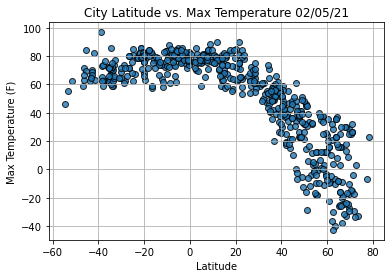

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

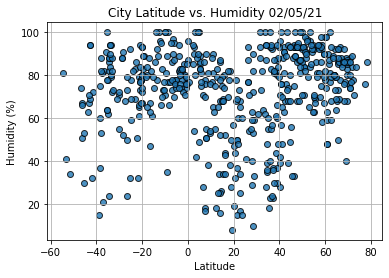

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

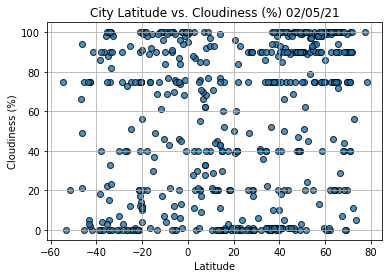

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

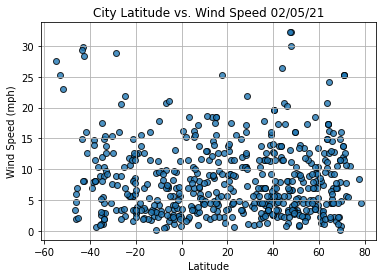

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()